## Business Objective 1

Customers Segmentation of East-West Airlines based on flying patterns to enhance use of frequent flyer rewards, and use of the airline credit card. This would lead to customer retention and higher profits.  

In [107]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
import numpy as np

In [108]:
sns.set()

### Data Dictionary

In [109]:
airline = pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')

### Exploratory Data Analysis

In [110]:
airline.sample(5)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
839,850,119932,0,3,1,1,22463,26,5177,11,6077,1
465,471,382546,0,5,1,1,136619,34,3000,6,8228,1
478,484,260261,0,4,1,1,33047,21,0,0,8146,1
494,500,122904,0,4,1,1,37380,21,1300,4,7956,0
1559,1574,36805,0,3,1,1,13018,16,0,0,3799,0


In [111]:
airline.shape

(3999, 12)

In [112]:
airline.dtypes

ID#                  int64
Balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
Award?               int64
dtype: object

In [113]:
airline.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [114]:
airline.duplicated().sum()

0

Imputation not needed

#### Univariate analysis

##### Moments

In [115]:
cols = set(airline.columns) - {'ID#'}
airline1 = airline[list(cols)]
airline1.describe().T

,count,mean,std,min,25%,50%,75%,max
Flight_trans_12,3999.0,1.373593,3.793172,0.0,0.0,0.0,1.0,53.0
Qual_miles,3999.0,144.114529,773.663804,0.0,0.0,0.0,0.0,11148.0
Days_since_enroll,3999.0,4118.559390,2065.134540,2.0,2330.0,4096.0,5790.5,8296.0
cc2_miles,3999.0,1.014504,0.147650,1.0,1.0,1.0,1.0,3.0
Balance,3999.0,73601.327582,100775.664958,0.0,18527.5,43097.0,92404.0,1704838.0
Flight_miles_12mo,3999.0,460.055764,1400.209171,0.0,0.0,0.0,311.0,30817.0
cc1_miles,3999.0,2.059515,1.376919,1.0,1.0,1.0,3.0,5.0
cc3_miles,3999.0,1.012253,0.195241,1.0,1.0,1.0,1.0,5.0
Bonus_miles,3999.0,17144.846212,24150.967826,0.0,1250.0,7171.0,23800.5,263685.0
Bonus_trans,3999.0,11.601900,9.603810,0.0,3.0,12.0,17.0,86.0


we can see that the mean has varied range. We would want to Standardize the data.

In [116]:
#Fisher's Kurtosis
airline1.drop(['cc1_miles','cc2_miles','cc3_miles','Award?'],axis=1).kurt(axis=0)

Flight_trans_12      42.978152
Qual_miles           67.689351
Days_since_enroll    -0.967505
Balance              44.157932
Flight_miles_12mo    94.761019
Bonus_miles          13.630489
Bonus_trans           2.745737
dtype: float64

In [117]:
#skew
airline1.drop(['cc1_miles','cc2_miles','cc3_miles','Award?'],axis=1).skew(axis=0)

Flight_trans_12      5.490461
Qual_miles           7.512395
Days_since_enroll    0.120174
Balance              5.004187
Flight_miles_12mo    7.451666
Bonus_miles          2.842093
Bonus_trans          1.157362
dtype: float64

##### Distributions

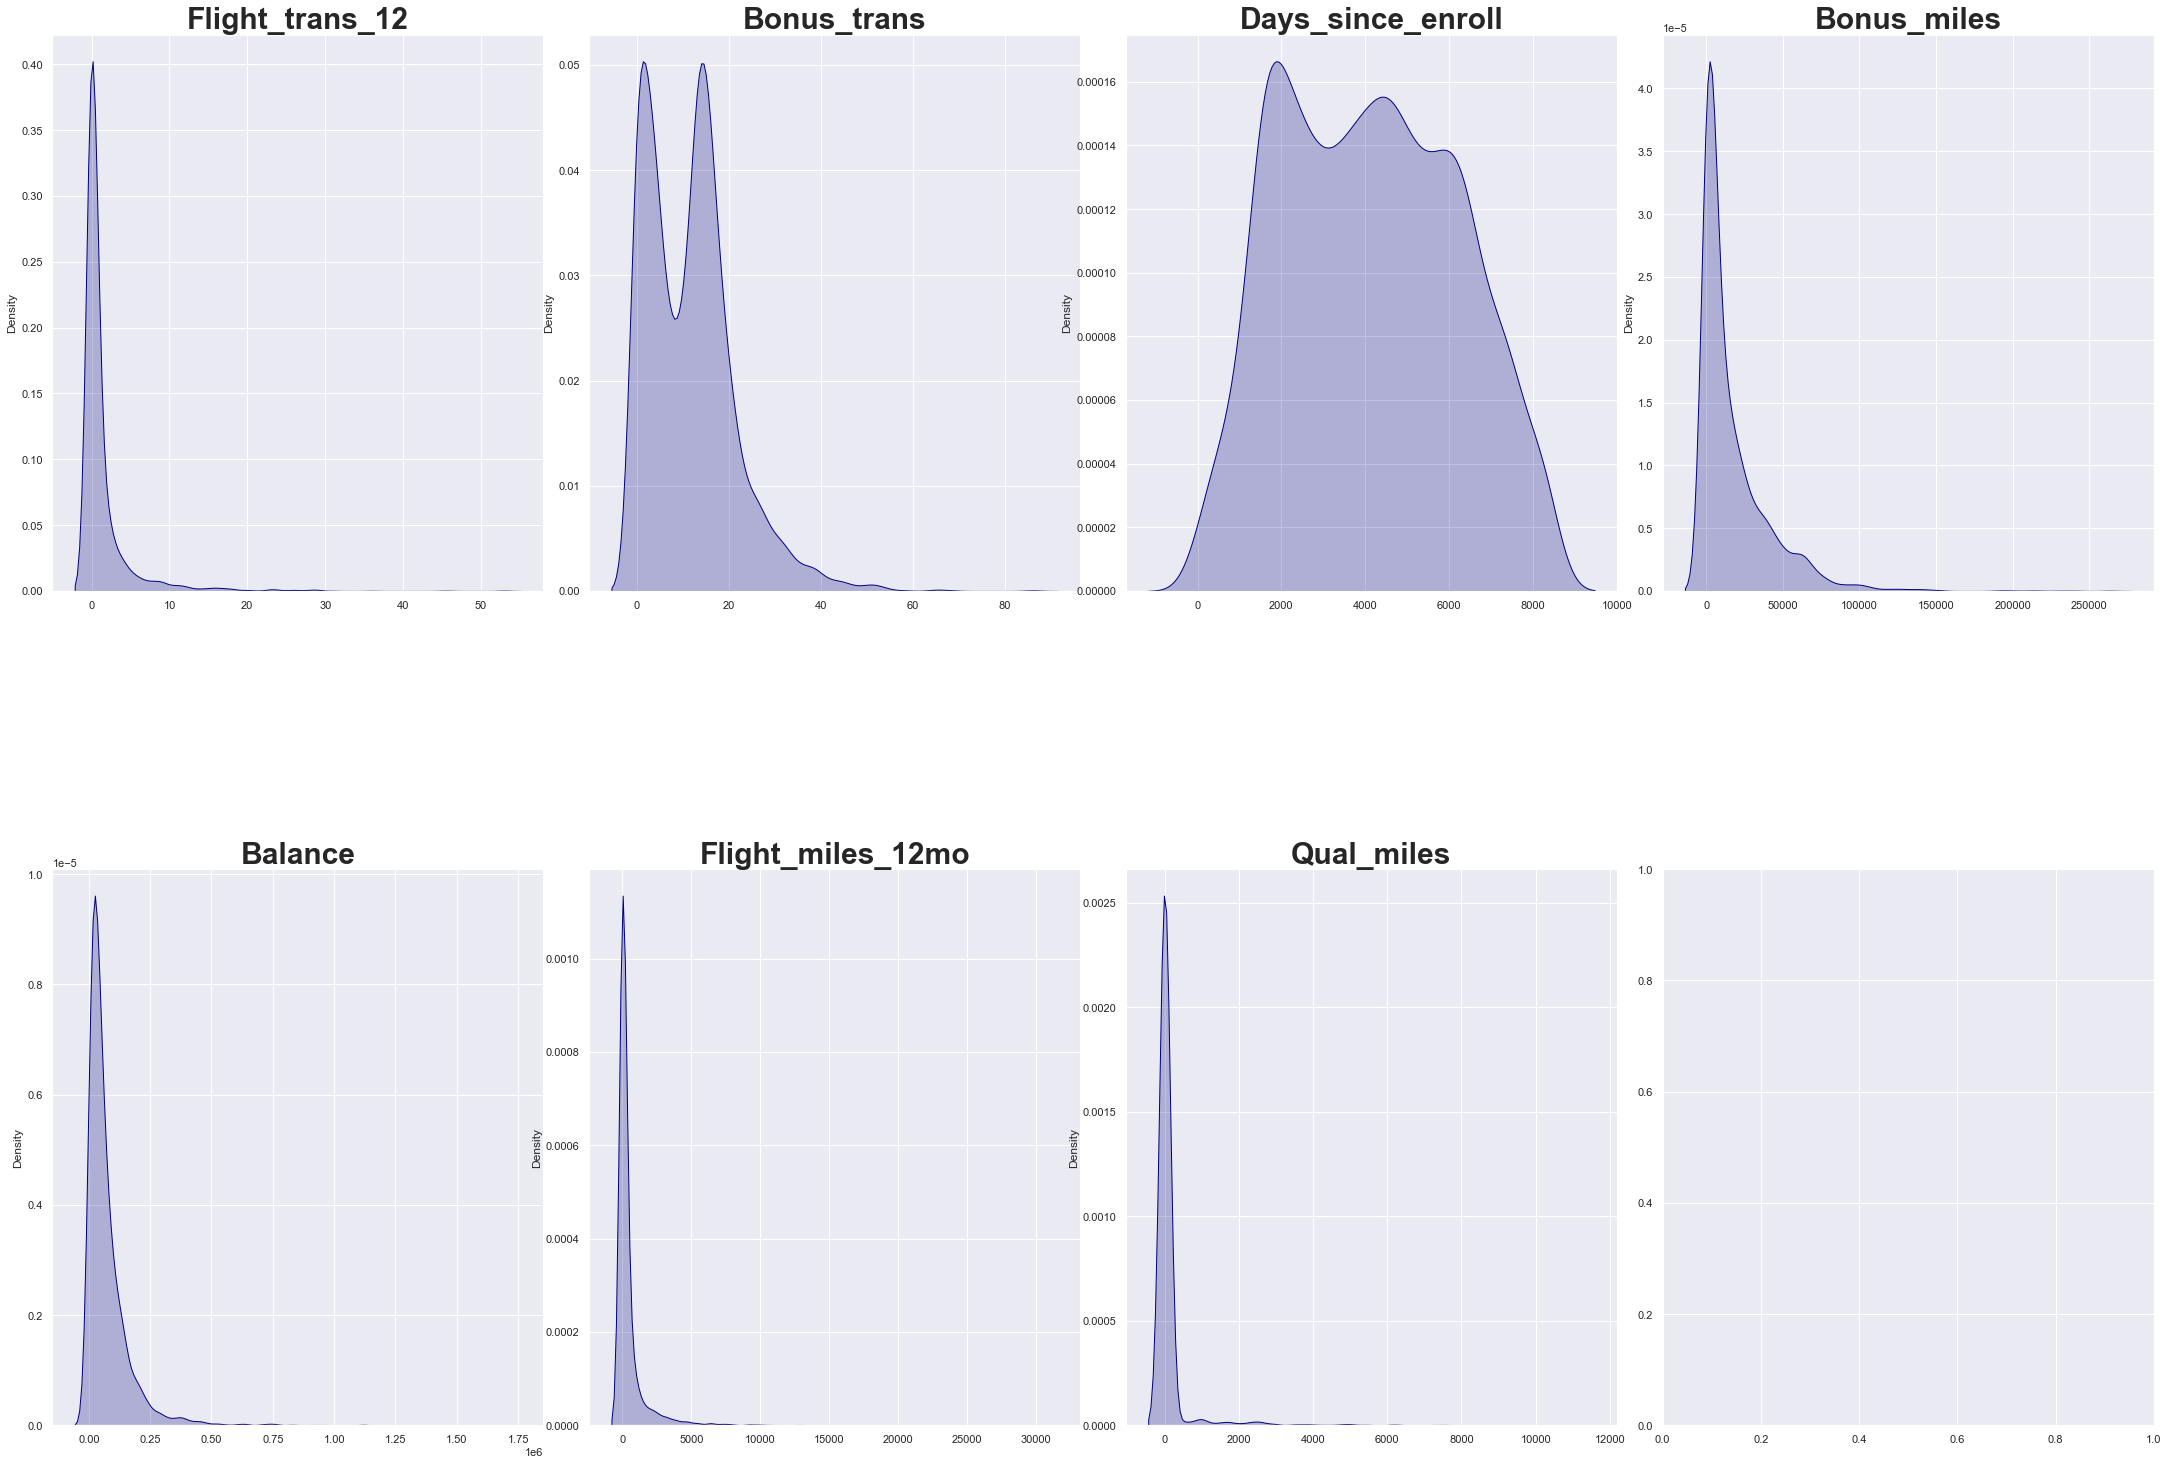

In [118]:
#display distributions for numeric data
fig, axes = plt.subplots(2, 4, sharex=False, figsize=(30,20))
fig.tight_layout()
cols = ['Flight_trans_12','Bonus_trans','Days_since_enroll','Bonus_miles','Balance','Flight_miles_12mo','Qual_miles']
axeslist = [axes[0,0],axes[0,1],axes[0,2],axes[0,3],axes[1,0],axes[1,1],axes[1,2]]
j=0
for col in cols:
    p= sns.kdeplot(data=airline1, ax=axeslist[j] ,x=col,fill=True,color="navy")
    p.set(xlabel=None)
    fig.subplots_adjust(hspace=0.5)
    axeslist[j].set_title(col,fontweight="bold", size=30)
    j= j+1

**Observations:**  
    * 'Flight_trans_12', , 'Bonus_trans', 'Bonus_miles', 'Balance', 'Flight_miles_12mo', 'Qual_miles'        are right skewed  
    * Bonus_miles,Balance,Flight_miles_12mo,Qual_miles are leptokurtic.
    * 'Bonus_trans', is bimodal  
    * Let's check the QQ plot for these columns

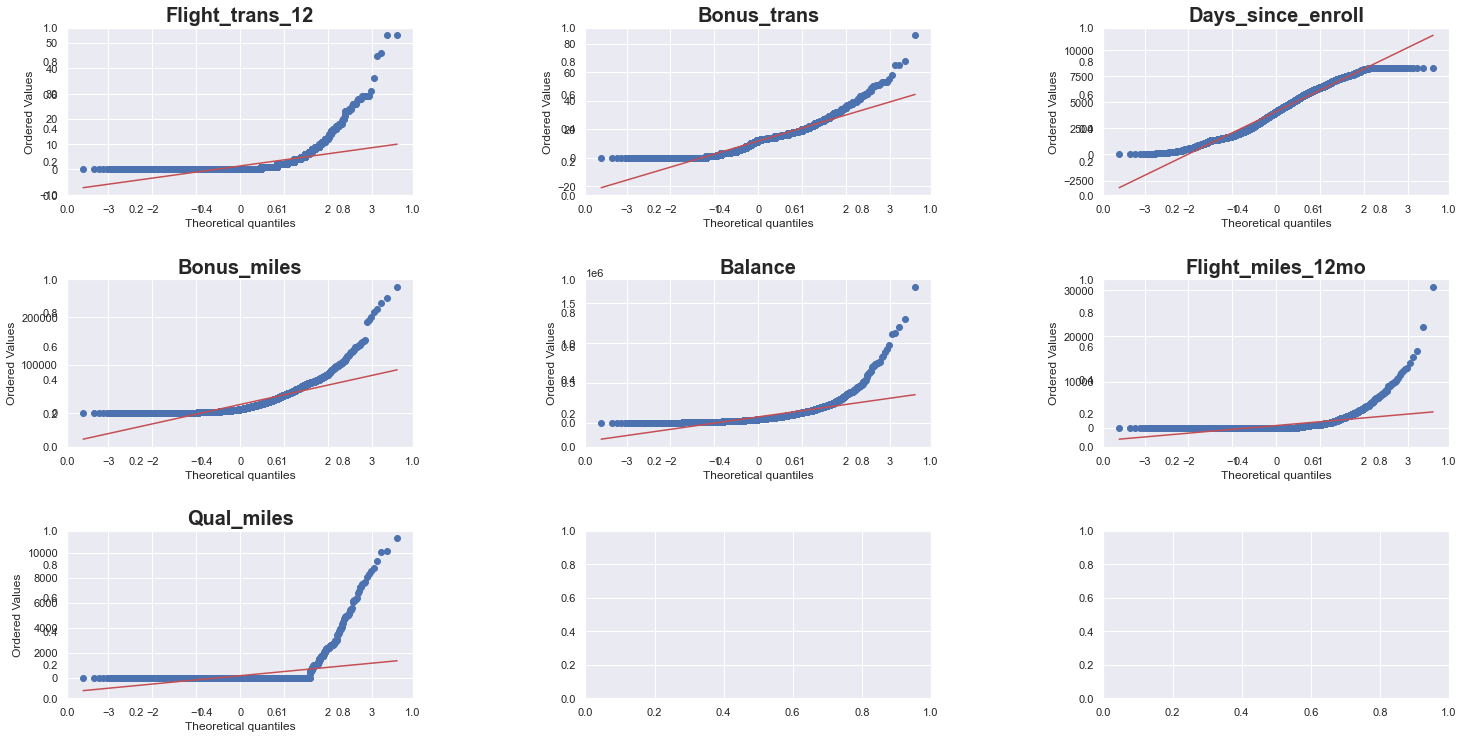

In [119]:
#Review QQ Plot for other normally distributed columns
import scipy.stats as stats
import pylab
cols = ['Flight_trans_12','Bonus_trans','Days_since_enroll','Bonus_miles','Balance','Flight_miles_12mo','Qual_miles']
fig, axes = plt.subplots(3, 3, sharex=False, figsize=(20,10))
fig.tight_layout()
nfig = [1,2,3,4,5,6,7]
j=0

for col in cols:
    ax = fig.add_subplot(3, 3, nfig[j])
    p=stats.probplot(airline1[col], dist="norm", plot=ax)
    ax.set_title(col,fontweight="bold", size=20)
    fig.subplots_adjust(wspace=0.5)
    fig.subplots_adjust(hspace=0.5)
    j= j+1


**Observations:**  
    * All columns are not normally distributed   
    * We will apply 'yeo-johnson' PowerTransformer on the non gaussian features when we create pipeline. 

In [120]:
from scipy.stats import shapiro
def shapiroWilkTest(df):
    # create an Empty DataFrame object
    scorecard = pd.DataFrame()
    alpha = 0.05
    clm= []
    stat1=[]
    p1=[]
    dist=[]
    j=0
    for c in df.columns:  
        stat, p = shapiro(df.iloc[:,j])
        clm.append(c)
        stat1.append(stat)
        p1.append(p)
        if p > alpha:
            dist.append('Gaussian') 
        else:
            dist.append('Not Gaussian')
        j=j+1
    scorecard['column'] = clm
    scorecard['stat'] = stat1
    scorecard['p'] = p1
    scorecard['Distribution'] = dist
    return scorecard

In [121]:
#Apply Shapiro-Wilk to test the null hypothesis that the data was drawn from a normal distribution.
shapiroWilkTest(airline1.drop(['cc1_miles','cc2_miles','cc3_miles','Award?'],axis=1))

,column,stat,p,Distribution
0,Flight_trans_12,0.401399,0.000000e+00,Not Gaussian
1,Qual_miles,0.187021,0.000000e+00,Not Gaussian
2,Days_since_enroll,0.974288,2.944762e-26,Not Gaussian
3,Balance,0.599004,0.000000e+00,Not Gaussian
4,Flight_miles_12mo,0.355629,0.000000e+00,Not Gaussian
5,Bonus_miles,0.705277,0.000000e+00,Not Gaussian
6,Bonus_trans,0.910475,1.541428e-43,Not Gaussian


##### Outlier Treatment

In [122]:
#split dataframe to get numeric data
airline1_num = airline1.drop(['cc1_miles','cc2_miles','cc3_miles','Award?'],axis=1)

In [123]:
from sklearn.preprocessing import MinMaxScaler
#Normalize data to view boxplot
scalerMM = MinMaxScaler()
airline1_norm= pd.DataFrame(scalerMM.fit_transform(airline1_num))
airline1_norm.columns=airline1_num.columns


In [124]:
airline1_norm.sample(4)

,Flight_trans_12,Qual_miles,Days_since_enroll,Balance,Flight_miles_12mo,Bonus_miles,Bonus_trans
3256,0.037736,0.0,0.266096,0.072180,0.033715,0.043855,0.058140
2928,0.018868,0.0,0.211116,0.004894,0.016225,0.005689,0.023256
3274,0.000000,0.0,0.212081,0.070892,0.000000,0.007585,0.011628
2794,0.000000,0.0,0.251025,0.022195,0.000000,0.043658,0.186047


<AxesSubplot:>

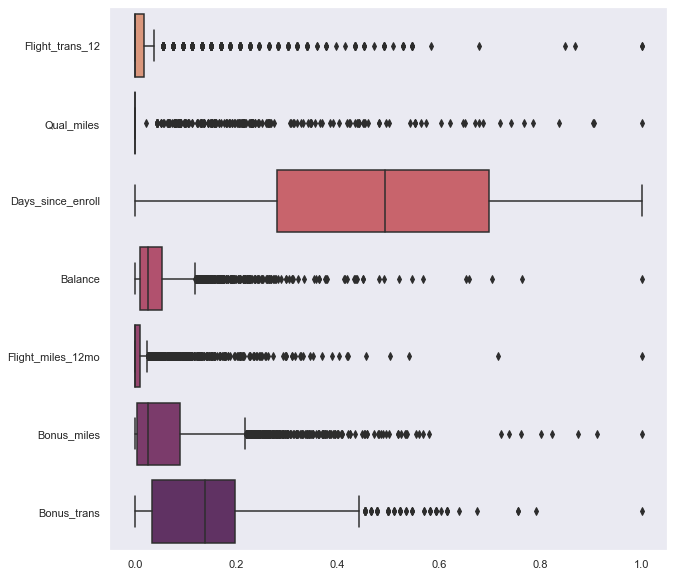

In [125]:
#View outliers for non Gaussian distributions
plt.figure(figsize=(10,10))
sns.set_style("dark")
sns.boxplot(data=airline1_norm, orient="h", palette = 'flare')

In [126]:
#function to get outliers from all numeric features
def IQR_Outliers (X, features):
    
    Outlier_df = pd.DataFrame()
    ulimit=[]
    llimit=[]
    no_of_outliers =[]
    perc = []
    feature = []


    indices = [x for x in X.index]
    print('Number of samples: ', len(indices))
    
    out_indexlist = []
        
    for col in features:
       
        #Using nanpercentile instead of percentile because of nan values
        Q1 = np.nanpercentile(X[col], 25.)
        Q3 = np.nanpercentile(X[col], 75.)
        
        cut_off = (Q3 - Q1) * 1.5
        upper, lower = Q3 + cut_off, Q1 - cut_off
        
        feature.append(col)        
        ulimit.append(upper)
        llimit.append(lower)
                
        outliers_index = X[col][(X[col] < lower) | (X[col] > upper)].index.tolist()
        outliers = X[col][(X[col] < lower) | (X[col] > upper)].values
        

        no_of_outliers.append(len(outliers))
        perc.append(round((len(outliers)*100)/len(indices),2))

        out_indexlist.extend(outliers_index)
    
    Outlier_df['feature'] = feature
    Outlier_df['no_of_outliers']= no_of_outliers 
    Outlier_df['percentage']= perc
    Outlier_df['upper_limit']= ulimit
    Outlier_df['lower_limit']= llimit
                   
    #using set to remove duplicates
    out_indexlist = list(set(out_indexlist))
    out_indexlist.sort()
    print('\nNumber of rows with outliers: ', len(out_indexlist))
    return Outlier_df   


In [127]:
#get outliers from all numeric features
IQR_Outliers(airline1, ['Flight_trans_12', 'Bonus_trans', 'Days_since_enroll','Bonus_miles', 'Balance', 'Flight_miles_12mo',
       'Qual_miles'])

Number of samples:  3999

Number of rows with outliers:  1090


,feature,no_of_outliers,percentage,upper_limit,lower_limit
0,Flight_trans_12,565,14.13,2.50,-1.50
1,Bonus_trans,63,1.58,38.00,-18.00
2,Days_since_enroll,0,0.00,10981.25,-2860.75
3,Bonus_miles,280,7.00,57626.25,-32575.75
4,Balance,266,6.65,203218.75,-92287.25
5,Flight_miles_12mo,569,14.23,777.50,-466.50
6,Qual_miles,226,5.65,0.00,0.00


We will consider only upper limits as Flight_trans_12', 'Bonus_trans','Bonus_miles', 'Balance', 'Flight_miles_12mo'.    
'Qual_miles' has 164 unique values and 226 outliers on the right side. We will exclude this field from treatment, else we end up with all zero values.

We will author a custom Transformer to cap the outliers

In [128]:
from sklearn.base import BaseEstimator,TransformerMixin
class OutlierCapper(BaseEstimator,TransformerMixin):
    def __init__(self,factor=1.5):
        self.factor = factor
        
    def outlier_cap(self,X,y=None):
        X = pd.Series(X).copy()
        q1 = X.quantile(0.25)
        q3 = X.quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - (self.factor * iqr)
        upper_bound = q3 + (self.factor * iqr)
        X.loc[(X < lower_bound)] = lower_bound 
        X.loc[(X > upper_bound)] = upper_bound 
        return pd.Series(X)
    
    def fit(self,X,y=None):
        return self
    
    def transform(self,X,y=None):
        return X.apply(self.outlier_cap)

In [129]:
from sklearn.compose import ColumnTransformer
outlierTreatment = ColumnTransformer([
    ('outlier_capper',OutlierCapper(),['Flight_trans_12', 'Bonus_trans', 'Days_since_enroll','Bonus_miles', 'Balance', 'Flight_miles_12mo'])
],remainder='passthrough')

In [130]:
data_without_outliers = pd.DataFrame(outlierTreatment.fit_transform(airline1),columns=airline1.columns)

In [131]:
IQR_Outliers(data_without_outliers, ['Flight_trans_12', 'Bonus_trans', 'Days_since_enroll','Bonus_miles', 'Balance', 'Flight_miles_12mo',
       'Qual_miles'])

Number of samples:  3999

Number of rows with outliers:  18


,feature,no_of_outliers,percentage,upper_limit,lower_limit
0,Flight_trans_12,0,0.00,2.50,-1.50
1,Bonus_trans,18,0.45,1.00,1.00
2,Days_since_enroll,0,0.00,10981.25,-2860.75
3,Bonus_miles,0,0.00,6.00,-2.00
4,Balance,0,0.00,203218.75,-92287.25
5,Flight_miles_12mo,0,0.00,777.50,-466.50
6,Qual_miles,0,0.00,38.00,-18.00


<AxesSubplot:>

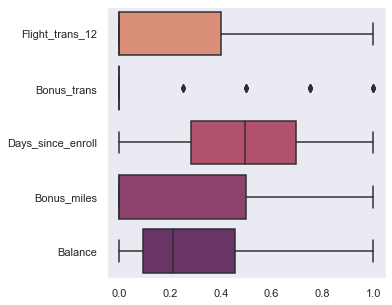

In [132]:
#View boxplot post outlier treatment
scalerMM = MinMaxScaler()
data_without_outliers_norm= pd.DataFrame(scalerMM.fit_transform(data_without_outliers))
data_without_outliers_norm.columns=data_without_outliers.columns
plt.figure(figsize=(5,5))
sns.set_style("dark")
df = pd.DataFrame(data = data_without_outliers_norm, columns = ['Flight_trans_12','Bonus_trans','Days_since_enroll','Bonus_miles','Balance'])
sns.boxplot(data=df, orient="h", palette = 'flare')

**Observations**  
* The outliers are replaced with the upper limits at 1.5 times IQR

### Multivariate Analysis

#### Pair-wise Scatter Plots

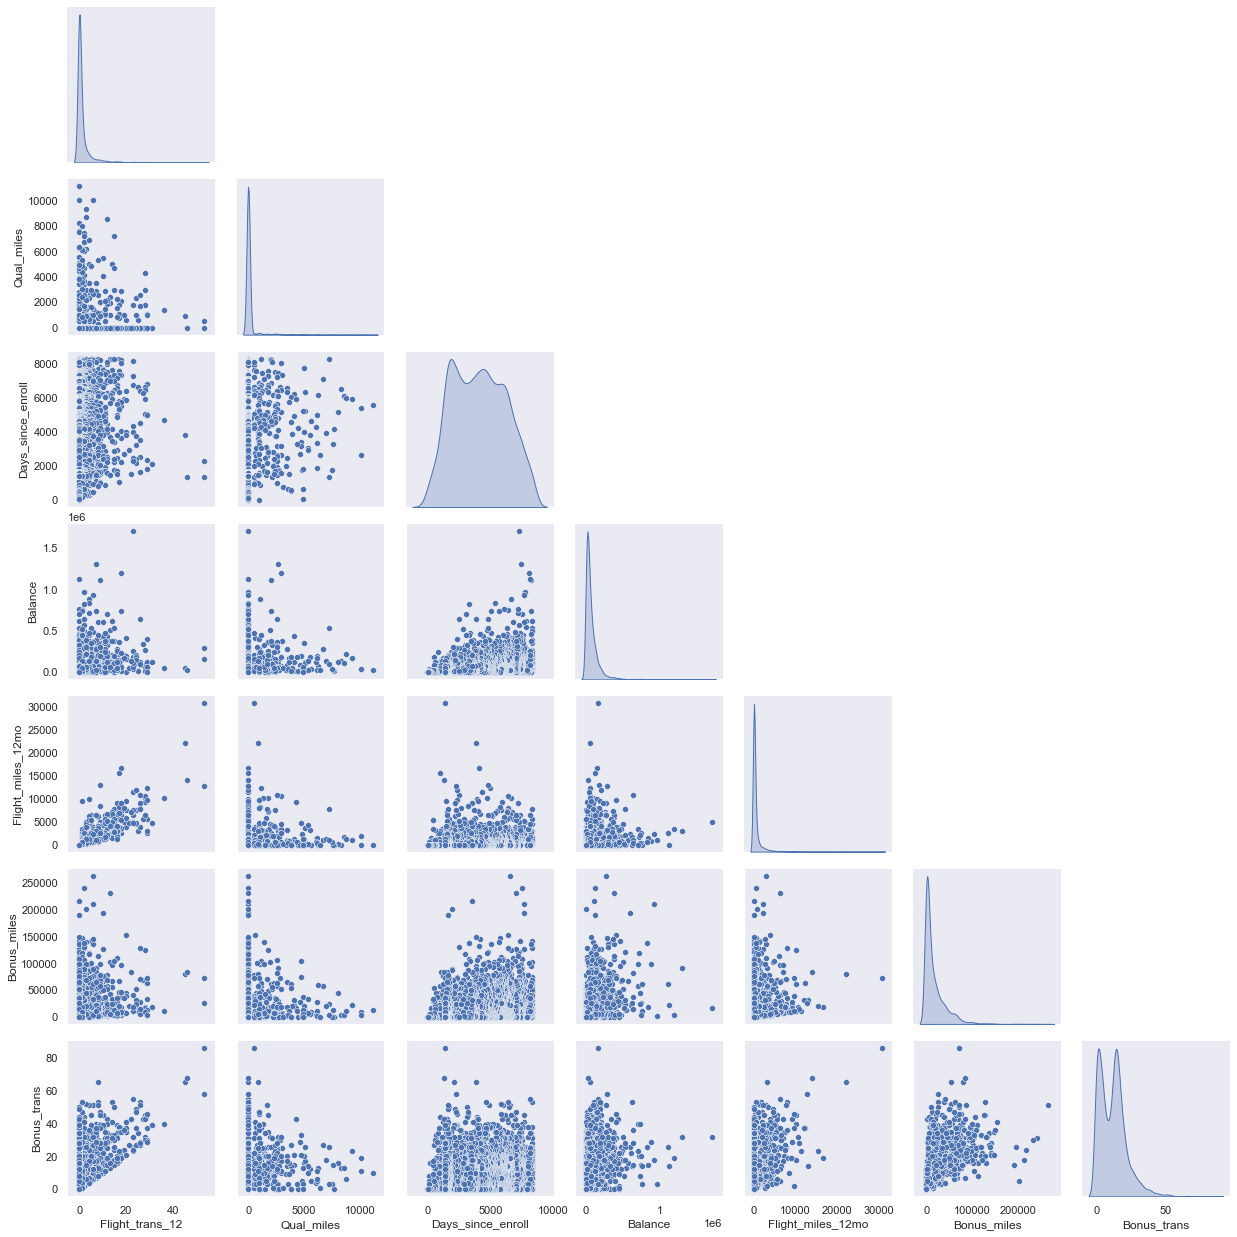

In [133]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 30,20
sns.pairplot(airline1_num,diag_kind="kde", diag_kws=dict(shade=True),corner=True)
#fig.suptitle('Airline Attributes Pairwise Plots', fontsize=14)

**Observations**  
* Flight_miles_12mo and Flight_trans_12 have a linear relationship  

#### Triangular Heat Map

<AxesSubplot:>

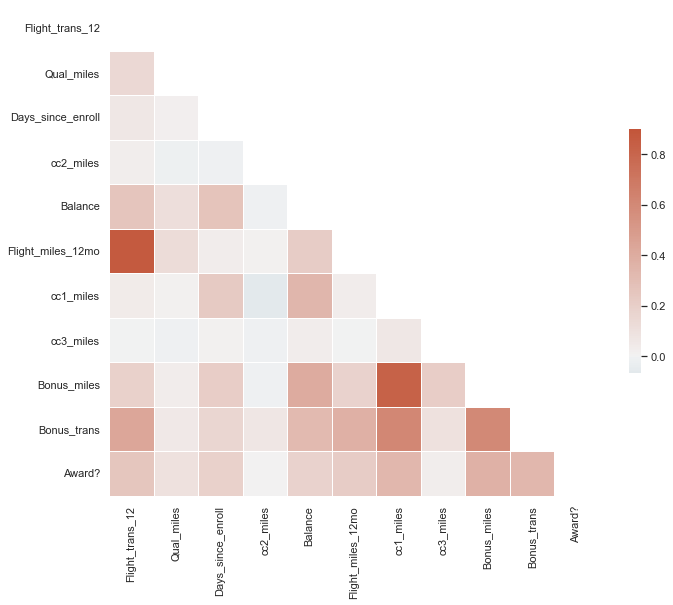

In [134]:
sns.set_theme(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(airline1.corr(), dtype=bool))

corr= airline1.corr(method ='pearson')

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(corr)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#### Correlation matrix

In [135]:
airline1.corr(method ='pearson')

,Flight_trans_12,Qual_miles,Days_since_enroll,cc2_miles,Balance,Flight_miles_12mo,cc1_miles,cc3_miles,Bonus_miles,Bonus_trans,Award?
Flight_trans_12,1.000000,0.144004,0.059260,0.028284,0.255700,0.869193,0.041333,-0.001117,0.185261,0.432364,0.247909
Qual_miles,0.144004,1.000000,0.017312,-0.013923,0.108722,0.126774,0.007931,-0.007779,0.031021,0.050725,0.095256
Days_since_enroll,0.059260,0.017312,1.000000,-0.005807,0.263129,0.037271,0.230849,0.010832,0.210397,0.161262,0.188121
cc2_miles,0.028284,-0.013923,-0.005807,1.000000,-0.008804,0.010598,-0.068223,-0.006166,-0.003969,0.064399,0.005332
Balance,0.255700,0.108722,0.263129,-0.008804,1.000000,0.217551,0.338344,0.035243,0.403487,0.324935,0.178494
Flight_miles_12mo,0.869193,0.126774,0.037271,0.010598,0.217551,1.000000,0.037370,-0.001777,0.183536,0.377216,0.217715
cc1_miles,0.041333,0.007931,0.230849,-0.068223,0.338344,0.037370,1.000000,0.060555,0.825200,0.608943,0.335457
cc3_miles,-0.001117,-0.007779,0.010832,-0.006166,0.035243,-0.001777,0.060555,1.000000,0.204134,0.097313,0.023484
Bonus_miles,0.185261,0.031021,0.210397,-0.003969,0.403487,0.183536,0.825200,0.204134,1.000000,0.603180,0.373506
Bonus_trans,0.432364,0.050725,0.161262,0.064399,0.324935,0.377216,0.608943,0.097313,0.603180,1.000000,0.333893


In [136]:
#Get only highly correlated items

df = airline1.corr().abs().round(1)
df = airline1.corr().round(1)
for column in df:
    ac = df[column].round(1)
    replace_col = df[((ac < 0.5) & (ac >= 0))| ((ac > -0.5) & (ac <= 0))].index
    df.at[replace_col, column]='blah'
df

,Flight_trans_12,Qual_miles,Days_since_enroll,cc2_miles,Balance,Flight_miles_12mo,cc1_miles,cc3_miles,Bonus_miles,Bonus_trans,Award?
Flight_trans_12,1.0,blah,blah,blah,blah,0.9,blah,blah,blah,blah,blah
Qual_miles,blah,1.0,blah,blah,blah,blah,blah,blah,blah,blah,blah
Days_since_enroll,blah,blah,1.0,blah,blah,blah,blah,blah,blah,blah,blah
cc2_miles,blah,blah,blah,1.0,blah,blah,blah,blah,blah,blah,blah
Balance,blah,blah,blah,blah,1.0,blah,blah,blah,blah,blah,blah
Flight_miles_12mo,0.9,blah,blah,blah,blah,1.0,blah,blah,blah,blah,blah
cc1_miles,blah,blah,blah,blah,blah,blah,1.0,blah,0.8,0.6,blah
cc3_miles,blah,blah,blah,blah,blah,blah,blah,1.0,blah,blah,blah
Bonus_miles,blah,blah,blah,blah,blah,blah,0.8,blah,1.0,0.6,blah
Bonus_trans,blah,blah,blah,blah,blah,blah,0.6,blah,0.6,1.0,blah


**Observations**  
* We can see that Flight_miles_12mo and Flight_trans_12 have very high positive correlation (0.9).
* Bonus_miles and Bonus_trans have  high positive correlation (0.6)  
* cc1_miles and Bonus_miles  have  very high positive correlation (0.8)  
* cc1_miles and Bonus_trans  have  high positive correlation (0.6)  

### Data Preprocessing

In [137]:
# Scaling - Standardize the numerical variables 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import ColumnTransformer

cols=['Flight_trans_12', 'Bonus_trans', 'Days_since_enroll','Bonus_miles', 'Balance', 'Flight_miles_12mo','Qual_miles',
      'cc1_miles','cc2_miles','cc3_miles','Award?']

outlierTreatment = ColumnTransformer([
    ('outlier_capper',OutlierCapper(),[0,2,3,5,6,8])],remainder='passthrough')

yeojohnson = ColumnTransformer([
    ('ptransform',PowerTransformer(method='yeo-johnson', standardize=False), [0,2,3,5,6,8,9])],remainder='passthrough')

scaling = ColumnTransformer([
    ('scale',StandardScaler(), slice(0,11))])


In [138]:
airline1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Flight_trans_12    3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   Days_since_enroll  3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   Balance            3999 non-null   int64
 5   Flight_miles_12mo  3999 non-null   int64
 6   cc1_miles          3999 non-null   int64
 7   cc3_miles          3999 non-null   int64
 8   Bonus_miles        3999 non-null   int64
 9   Bonus_trans        3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB


### Create Pipeline

In [139]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([
    ('outlierTreatment',outlierTreatment),
    ('yeojohnson',yeojohnson),
    ('scaling',scaling)
])

In [140]:
# Apply the tranformation
airline1_transformed = pipe.fit_transform(airline1) 

c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


In [141]:
#verify shape remains same after tranformation
tuple(map(lambda i, j: i - j, airline1.shape, airline1_transformed.shape))

(0, 0)

In [142]:
# View sample records after transformation
airline1_transformed[0:2,:]

array([[-0.68171654,  0.        , -0.68389045, -1.20629148, -0.2447433 ,
         0.        , -1.32967056,  1.39545434, -0.76957841, -0.45114078,
        -0.7669193 ],
       [-0.68171654,  0.        , -0.68389045, -1.16098167, -0.2447433 ,
         0.        , -1.07496022,  1.37995704, -0.76957841, -0.53945687,
        -0.7669193 ]])

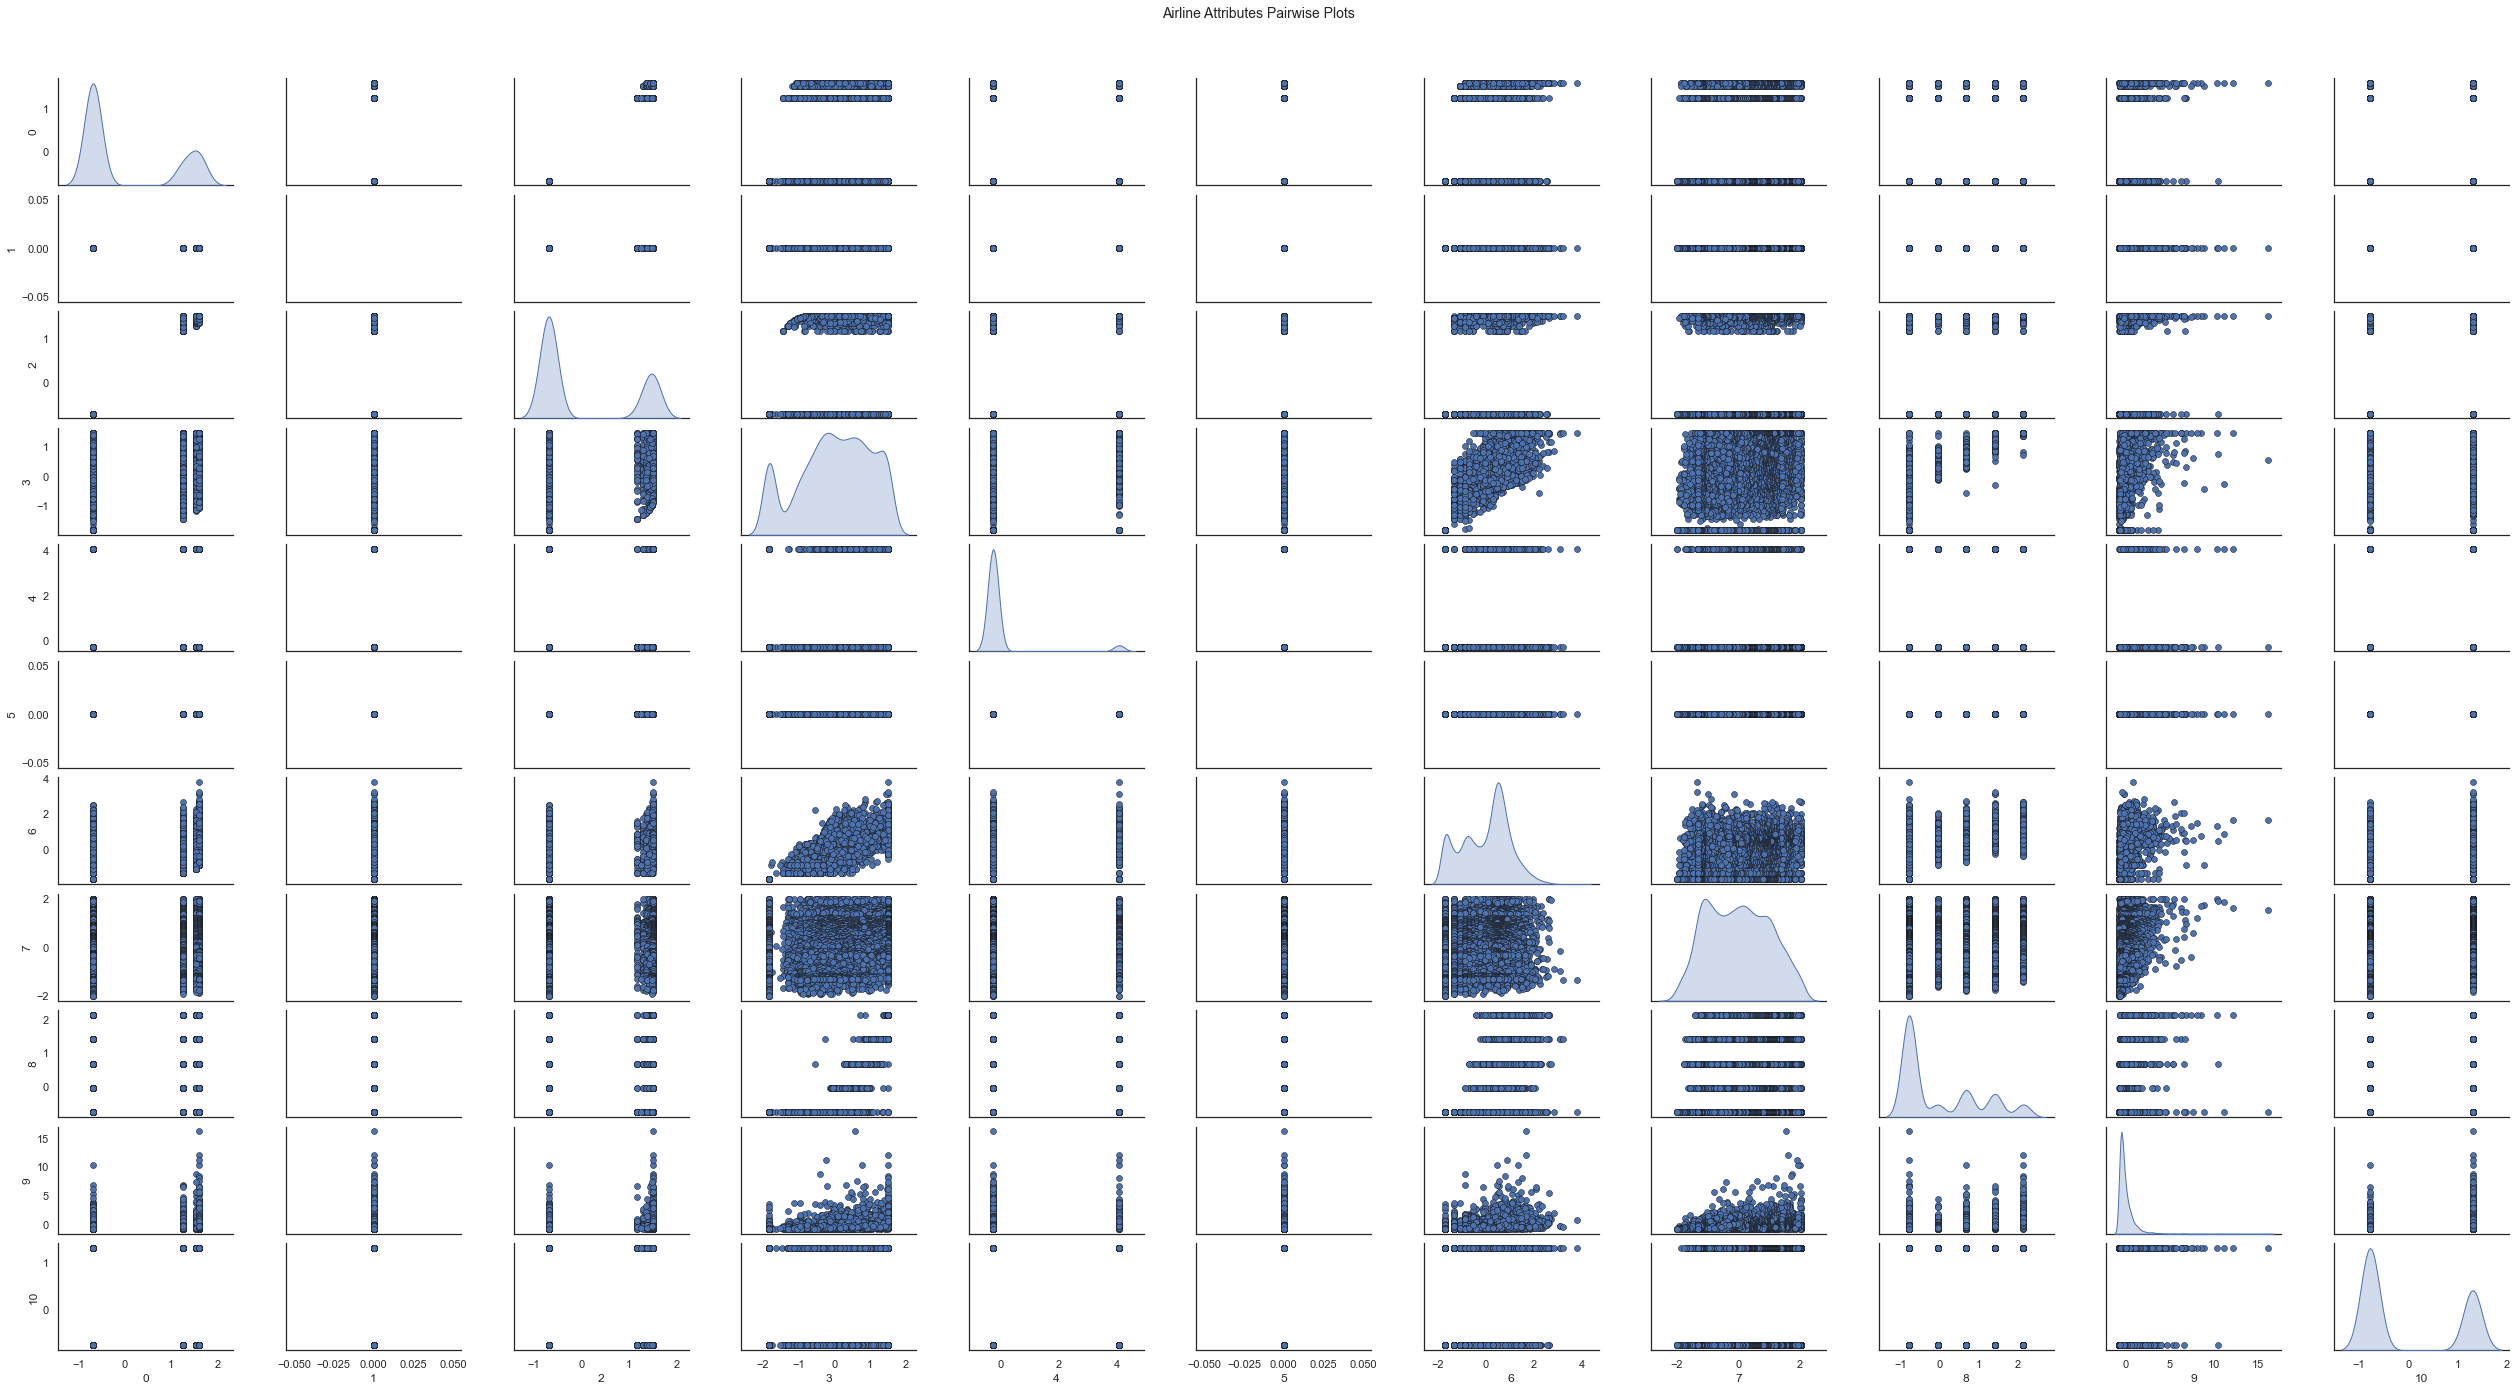

In [143]:
# Pair-wise Scatter Plots
wt = pd.DataFrame(airline1_transformed)
pp = sns.pairplot(wt, height=1.8, aspect=1.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True))

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Airline Attributes Pairwise Plots', fontsize=14)

In [144]:
# View Tranformation steps
pipe.named_steps

{'outlierTreatment': ColumnTransformer(remainder='passthrough',
                   transformers=[('outlier_capper', OutlierCapper(),
                                  [0, 2, 3, 5, 6, 8])]),
 'yeojohnson': ColumnTransformer(remainder='passthrough',
                   transformers=[('ptransform',
                                  PowerTransformer(standardize=False),
                                  [0, 2, 3, 5, 6, 8, 9])]),
 'scaling': ColumnTransformer(transformers=[('scale', StandardScaler(),
                                  slice(0, 11, None))])}

### Model Building

#### Agglomerative Clustering

##### View Dendrogram

In [145]:
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage

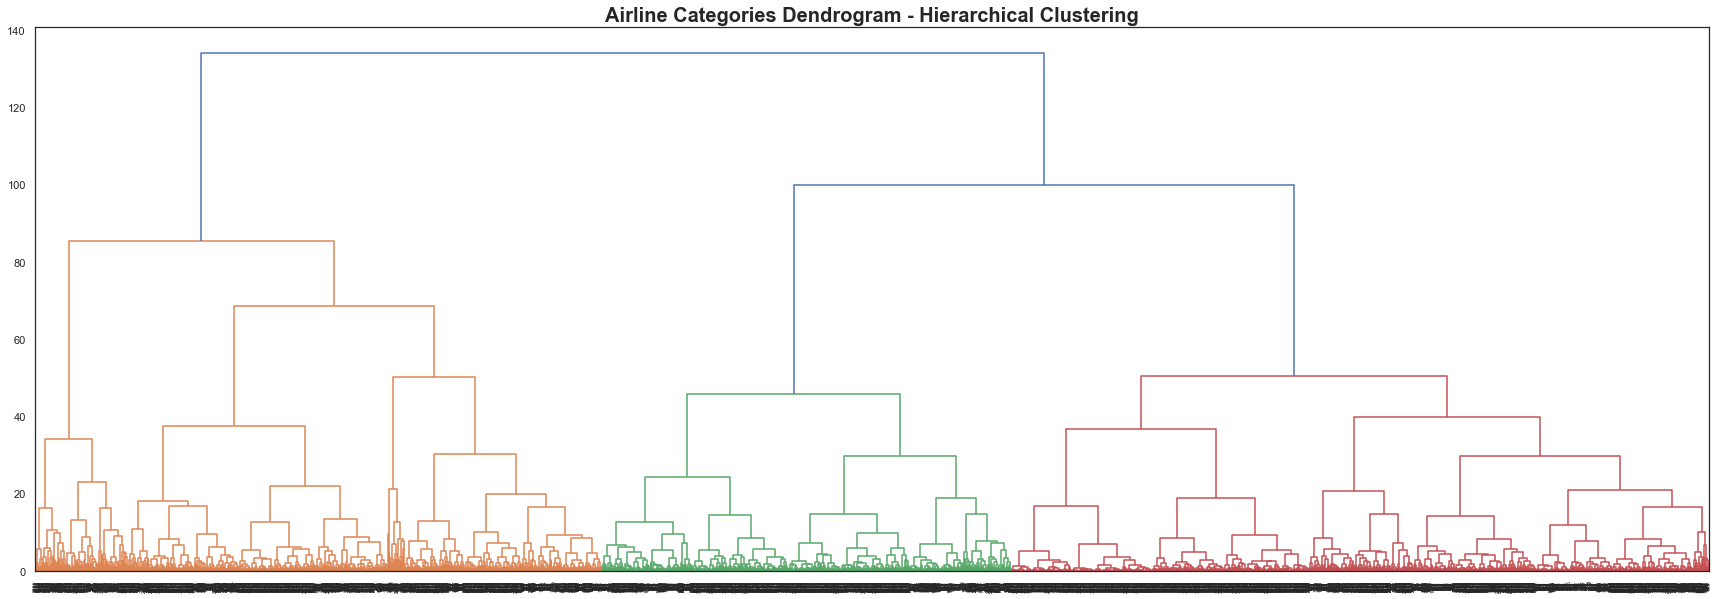

In [146]:
Z = linkage(airline1_transformed, method = "ward", metric = "euclidean")
plt.figure(figsize=(30, 10))
plt.title("Airline Categories Dendrogram - Hierarchical Clustering",fontsize=20,fontweight="bold")
dend = shc.dendrogram(Z)

In [147]:
#Function to plot truncated dendrogram
def plot_dendrogram(model, **kwargs):
  
    count = np.zeros(model.children_.shape[0])
    nsamples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        currentcount = 0
        for child_idx in merge:
            if child_idx < nsamples:
                currentcount += 1  
            else:
                currentcount += count[child_idx - nsamples]
        count[i] = currentcount

    linkagematrix = np.column_stack(
        [model.children_, model.distances_, count]
    ).astype(float)
    dendrogram(linkagematrix, **kwargs)    

##### Evaluate with Hyperparameters

We will evaluate the clustering fit based on the scores below, by tuning hyperparameters - number of clusters and Linkage.

###### Silhouette Score/ Calinski Harabasz Score/ Davies Bouldin Score

(Reference : https://scikit-learn.org/)

* **The Silhouette Coefficient** is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance    (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b). To clarify, b is the distance between     a sample and the nearest cluster that sample is not part of    
* **Calinski Harabasz Score** The score is defined as ratio between the within-cluster dispersion and the between-cluster            dispersion  
* **Davies Bouldin Score** The score is defined as the average similarity measure of each cluster with its most similar             cluster, where similarity is the ratio of within-cluster distances to between-cluster distances. Thus, clusters which are       farther apart and less dispersed will result in a better score.    
* **Cophenetic Correlation Coefficient:** If the cluster is good then the linking of objects in the cluster tree should have a     strong correlation with the distances between objects in the distance vector.

In [148]:
from sklearn.metrics import silhouette_score ,calinski_harabasz_score , davies_bouldin_score
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

# Defining a function to find the optimal number of clusters' n_clusters parameter
# Note that we are using a dataset that contains only numeric features. 

def agglomerationScorecard(transformed_df):
    arr = np.empty((10, 10), dtype=object)
    # Number of clusters to search for and silhouette_scores list
    range_n_clusters = [2, 3, 4, 5]
    linkages = ['ward','average','complete','single']
    silhouette_scores = []
    cal_har_scores =[]
    dav_boulds =[]
    clusters=[]
    linkages1 = []
    totals = []
    cophenetics=[]
    # create an Empty DataFrame object
    scorecard = pd.DataFrame()
    for n_clusters in range_n_clusters:
         for link in linkages:                      
            cluster = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage=link)
            labels_ = cluster.fit_predict(transformed_df)
            silhouette_avg = silhouette_score(transformed_df, labels_)
            cal_har_score = calinski_harabasz_score(transformed_df, labels_)
            dav_bould = davies_bouldin_score(transformed_df, labels_) 
            Z = linkage(transformed_df, method = link, metric = 'euclidean')
            cophenetic, coph_dists = cophenet(Z, pdist(transformed_df))
            clusters.append(n_clusters)
            linkages1.append(link)
            silhouette_scores.append(silhouette_avg)
            cal_har_scores.append(cal_har_score)
            dav_boulds.append(dav_bould)
            totals.append(silhouette_avg + cal_har_score + dav_bould )
            cophenetics.append(cophenetic) 
    scorecard['clusters'] = clusters
    scorecard['linkage'] = linkages1
    scorecard['silhouette'] = silhouette_scores
    scorecard['calinski_harabasz'] =cal_har_scores
    scorecard['davies_bouldin']  = dav_boulds
    scorecard['Total']  = totals
    scorecard['cophenetic']  = cophenetics
    return scorecard

In [149]:
# View the total of silhouette calinski_harabasz_score and davies_bouldin_score from highest to lowest scores
# View cophenetic coefficient for the same
s= agglomerationScorecard(airline1_transformed)
s = s.sort_values(['Total'], ascending=False ,ignore_index=True)
s

,clusters,linkage,silhouette,calinski_harabasz,davies_bouldin,Total,cophenetic
0,2,ward,0.310447,1326.798393,1.591860,1328.700701,0.622531
1,4,ward,0.287503,1273.686334,1.250184,1275.224020,0.622531
2,3,ward,0.245699,1264.731767,1.407698,1266.385165,0.622531
3,5,ward,0.305149,1240.130816,1.241077,1241.677043,0.622531
4,4,complete,0.388754,274.230639,1.061853,275.681246,0.722013
5,5,average,0.370305,233.161298,0.861852,234.393455,0.819182
6,5,complete,0.373729,214.117364,1.078709,215.569802,0.722013
7,4,single,0.396235,209.838747,0.719318,210.954300,0.724883
8,5,single,0.387592,173.387785,0.693368,174.468745,0.724883
9,3,complete,0.507649,102.794645,0.875352,104.177645,0.722013


**Observations:**  
* We find the two clusters with ward linkage highest overall score (silhoutte = 0.31).    
* We find two clusters with single linkage highest in silhoutte score (silhoutte = 0.76).  

We choose Two clusters with ward linkage beased on above results

###### Option 1: Two clusters with ward linkage

In [150]:
cluster = AgglomerativeClustering(n_clusters=2 , affinity='euclidean',linkage='ward',compute_distances=True)
labels_=cluster.fit_predict(airline1_transformed)

In [151]:
# Data points spread
cluster.labels_

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [152]:
# Data points count per label
unique, counts = np.unique(labels_, return_counts=True)
np.asarray((unique, counts)).T

array([[   0, 2645],
       [   1, 1354]], dtype=int64)

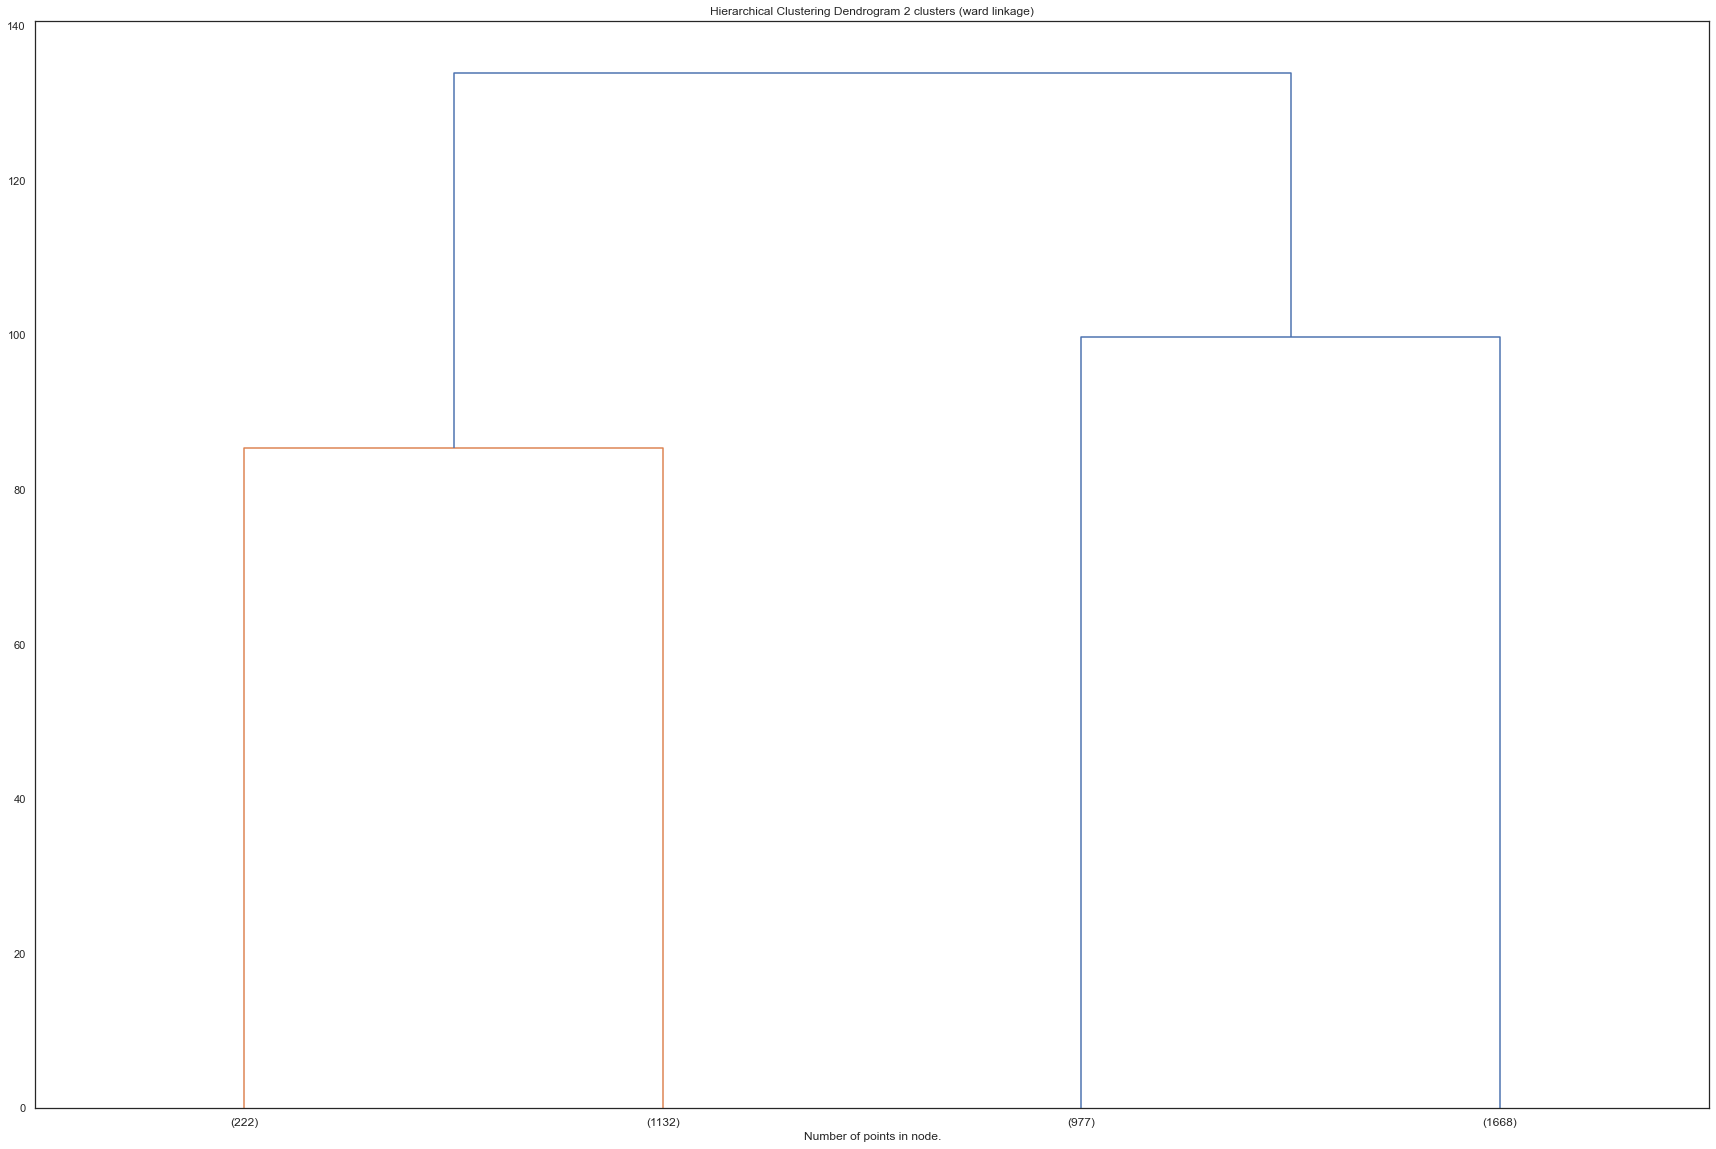

In [153]:
from scipy.cluster.hierarchy import dendrogram
plt.title("Hierarchical Clustering Dendrogram 2 clusters (ward linkage)")
# plot the top two levels of the dendrogram
plot_dendrogram(cluster, truncate_mode="level", p=1)
plt.xlabel("Number of points in node.")
plt.show()

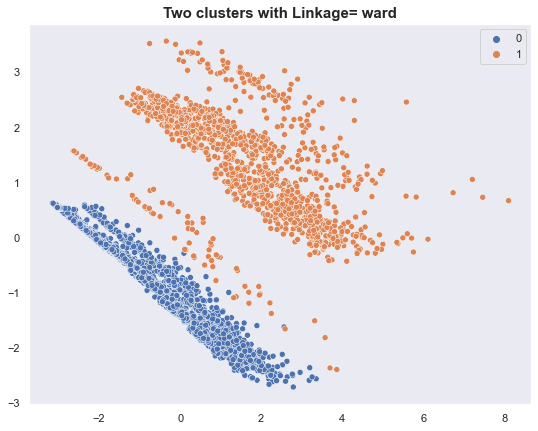

In [154]:
from sklearn import decomposition
# Transform data to visualize data in 2d
sns.set_style('dark')
pca = decomposition.PCA(n_components=3)
wine_pca = pca.fit_transform(airline1_transformed)
plt.figure(figsize=(9,7))
sns.scatterplot(hue=cluster.labels_, x=wine_pca[:,0], y=wine_pca[:,1],palette="deep")
plt.title("Two clusters with Linkage= ward",fontsize=15,fontweight="bold")
plt.show()

### Benefits/impact of the solution 

In [155]:
#Link the clusters to original data

cluster_labels = pd.Series(cluster.labels_)
airline1['cluster'] = cluster_labels # creating a new column and assigning it to new column

In [156]:
airline1

,Flight_trans_12,Qual_miles,Days_since_enroll,cc2_miles,Balance,Flight_miles_12mo,cc1_miles,cc3_miles,Bonus_miles,Bonus_trans,Award?,cluster
0,0,0,7000,1,28143,0,1,1,174,1,0,0
1,0,0,6968,1,19244,0,1,1,215,2,0,0
2,0,0,7034,1,41354,0,1,1,4123,4,0,0
3,0,0,6952,1,14776,0,1,1,500,1,0,0
4,4,0,6935,1,97752,2077,4,1,43300,26,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,1,0,1403,1,18476,200,1,1,8525,4,1,1
3995,0,0,1395,1,64385,0,1,1,981,5,1,0
3996,0,0,1402,1,73597,0,3,1,25447,8,1,0
3997,1,0,1401,1,54899,500,1,1,500,1,0,1


In [157]:
airline1.groupby('cluster').size()

cluster
0    2645
1    1354
dtype: int64

In [158]:
#airline1.groupby('cluster', as_index=False)['Bonus_trans','Bonus_miles'].mean()
airline1.groupby('cluster').mean()

,Flight_trans_12,Qual_miles,Days_since_enroll,cc2_miles,Balance,Flight_miles_12mo,cc1_miles,cc3_miles,Bonus_miles,Bonus_trans,Award?
cluster,,,,,,,,,,,
0,0.000000,0.000000,3989.462760,1.013611,54741.389036,0.000000,1.94896,1.010586,13640.905860,9.753119,0.271456
1,4.056869,425.638109,4370.745938,1.016248,110443.674298,1358.761448,2.27548,1.015510,23989.692762,15.213442,0.563516


In [159]:
airline1.corr()

,Flight_trans_12,Qual_miles,Days_since_enroll,cc2_miles,Balance,Flight_miles_12mo,cc1_miles,cc3_miles,Bonus_miles,Bonus_trans,Award?,cluster
Flight_trans_12,1.000000,0.144004,0.059260,0.028284,0.255700,0.869193,0.041333,-0.001117,0.185261,0.432364,0.247909,0.506190
Qual_miles,0.144004,1.000000,0.017312,-0.013923,0.108722,0.126774,0.007931,-0.007779,0.031021,0.050725,0.095256,0.260383
Days_since_enroll,0.059260,0.017312,1.000000,-0.005807,0.263129,0.037271,0.230849,0.010832,0.210397,0.161262,0.188121,0.087382
cc2_miles,0.028284,-0.013923,-0.005807,1.000000,-0.008804,0.010598,-0.068223,-0.006166,-0.003969,0.064399,0.005332,0.008455
Balance,0.255700,0.108722,0.263129,-0.008804,1.000000,0.217551,0.338344,0.035243,0.403487,0.324935,0.178494,0.261603
Flight_miles_12mo,0.869193,0.126774,0.037271,0.010598,0.217551,1.000000,0.037370,-0.001777,0.183536,0.377216,0.217715,0.459278
cc1_miles,0.041333,0.007931,0.230849,-0.068223,0.338344,0.037370,1.000000,0.060555,0.825200,0.608943,0.335457,0.112234
cc3_miles,-0.001117,-0.007779,0.010832,-0.006166,0.035243,-0.001777,0.060555,1.000000,0.204134,0.097313,0.023484,0.011935
Bonus_miles,0.185261,0.031021,0.210397,-0.003969,0.403487,0.183536,0.825200,0.204134,1.000000,0.603180,0.373506,0.202806
Bonus_trans,0.432364,0.050725,0.161262,0.064399,0.324935,0.377216,0.608943,0.097313,0.603180,1.000000,0.333893,0.269091


* Observe a strong correlation between cluster and Flight_trans_12. Net-net people are segregated by Flight_trans_12 followed by Award?.   
* We have 2645 people who have not flown in the past 12 months  (cluster 0)
* Would target the above group by increasing the incentive for cc2 and cc3 miles.  
* Would increase the bonus miles for the above group.  
